# 과제 10
1. house 데이터에 적용한 **linear regression, support vector machine(선형), 그리고 RANSAC 에 의해 추정된 선형모형을 제시**하고, **RANSAC(그러므로 outlier가 제거된 OLS 선형모형)과의 비교**를 통해 **linear regression 모형과 support vector machine을 설명**하라.


In [1]:
import pandas as pd
import numpy as np
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


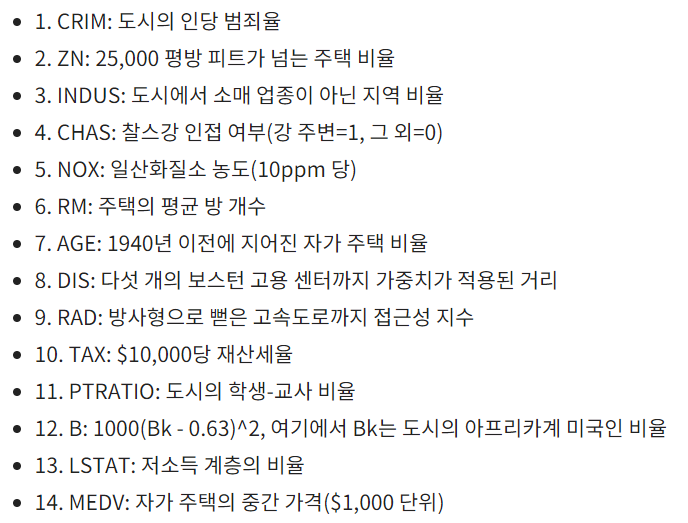

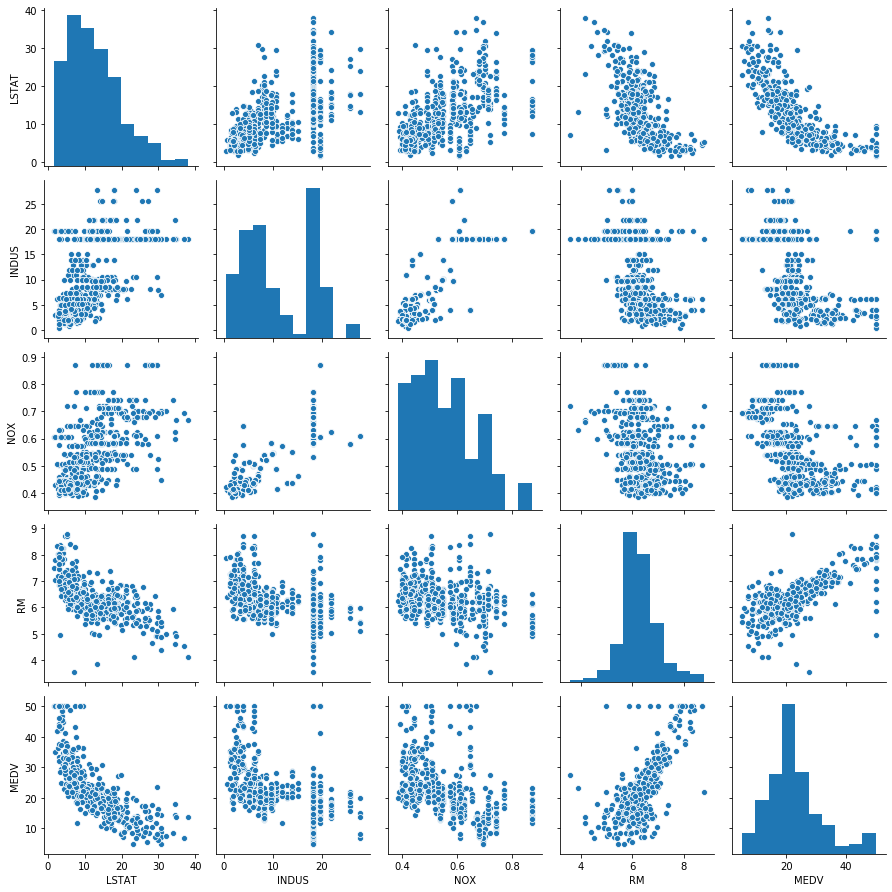

In [2]:
#종속변수 MEDV(집가격)와 설명변수의 Plot 그리기.
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

col1 = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
col2 = ['ZN', 'AGE', 'DIS', 'TAX','PTRATIO', 'MEDV']
sns.pairplot(house[col1], size=2.5)
plt.tight_layout()
plt.show()

In [3]:
#종속변수 MEDV(집가격)와 설명변수의 상관계수 행렬 구하기
import numpy as np
cm1 = np.corrcoef(house[col1].values.T)
print(cm1)

[[ 1.          0.60379972  0.59087892 -0.61380827 -0.73766273]
 [ 0.60379972  1.          0.76365145 -0.39167585 -0.48372516]
 [ 0.59087892  0.76365145  1.         -0.30218819 -0.42732077]
 [-0.61380827 -0.39167585 -0.30218819  1.          0.69535995]
 [-0.73766273 -0.48372516 -0.42732077  0.69535995  1.        ]]


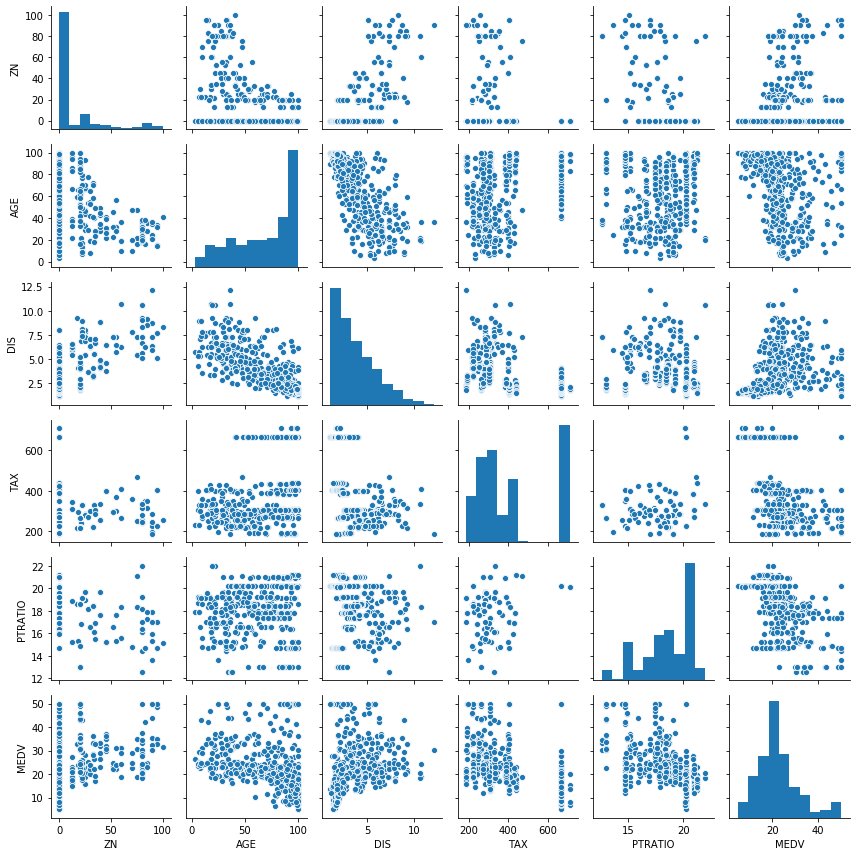

In [4]:
sns.pairplot(house[col2], size=2.0)
plt.tight_layout()
plt.show()

In [5]:
cm2 = np.corrcoef(house[col2].values.T)
print(cm2)

[[ 1.         -0.56953734  0.66440822 -0.31456332 -0.39167855  0.36044534]
 [-0.56953734  1.         -0.74788054  0.50645559  0.26151501 -0.37695457]
 [ 0.66440822 -0.74788054  1.         -0.53443158 -0.23247054  0.24992873]
 [-0.31456332  0.50645559 -0.53443158  1.          0.46085304 -0.46853593]
 [-0.39167855  0.26151501 -0.23247054  0.46085304  1.         -0.50778669]
 [ 0.36044534 -0.37695457  0.24992873 -0.46853593 -0.50778669  1.        ]]


In [6]:
#일부 변수에 대한 log 변환
import numpy as np
house['LLSTAT']=np.log(house['LSTAT'])
house['LINDUS']=np.log(house['INDUS'])
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LLSTAT,LINDUS
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1.605430,0.837248
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,2.212660,1.955860
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1.393766,1.955860
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1.078410,0.779325
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1.673351,0.779325


In [7]:
#전체 data를 종속변수 y와 특성변수 X의 data로 나누기
y = house['MEDV'].values
house1=house.drop(['LSTAT','INDUS','MEDV'],axis=1)
X = house1

In [8]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


## 1. Linear Regression

In [10]:
#regression module 불러오기와 모형추정
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
# predict
y_train_pred=mlr.predict(X_train)
y_test_pred=mlr.predict(X_test)
print('Slope:' ,mlr.coef_)
print('-'* 50)
print('Intercept:' ,mlr.intercept_)
print('-'* 50)

Slope: [-1.36676828e-01  3.13177997e-02  2.52393199e+00 -1.70295629e+01
  1.23977704e+00  3.06818458e-02 -1.28840466e+00  2.61968148e-01
 -6.58141653e-03 -8.27862485e-01  4.90558897e-03 -9.97211822e+00
 -6.04522425e-01]
--------------------------------------------------
Intercept: 65.69779117501747
--------------------------------------------------


In [11]:
X_train.columns

Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LLSTAT', 'LINDUS'],
      dtype='object')

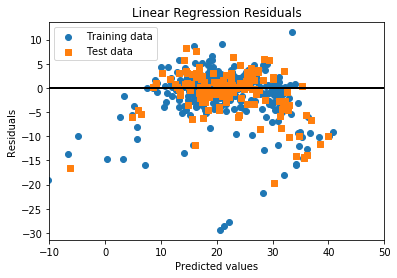

In [20]:
# 잔차 plot
plt.scatter(y_train_pred, y_train_pred - y_train,marker='o',label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.title('Linear Regression Residuals')
plt.show()

In [13]:
# 모형의 MSE
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

# 모형의 R^2
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

MSE train: 18.139, test: 17.416
R^2 train: 0.777, test: 0.810


## 2. RANSAC (Robust regression)

In [15]:
from sklearn.linear_model import RANSACRegressor  
rans = RANSACRegressor(max_trials=100,min_samples=45,
                       loss='absolute_loss',residual_threshold=5.0, random_state=1)
rans.fit(X_train,y_train)
y_train_pred=rans.predict(X_train)
y_test_pred=rans.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

MSE train: 26.959, test: 22.296
R^2 train: 0.668, test: 0.757


In [40]:
# 회귀모형
rans.estimator_.coef_ # coefficient

array([-0.33997467,  0.02628575,  1.26584351, -6.7774809 ,  3.20459419,
       -0.03651634, -1.13372086,  0.24298439, -0.00712198, -0.59996172,
        0.01186441, -3.85624577, -1.01175348])

In [42]:
rans.estimator_.intercept_  # intercept

31.427983601251576

In [43]:
X_train.columns

Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LLSTAT', 'LINDUS'],
      dtype='object')

In [18]:
# RANSAC에서 회귀 계수를 추정하는데 사용한데이터(inner)와 특이치(outlier)출력
inlier_mask=rans.inlier_mask_
print('inner',inlier_mask)

inner [ True  True False  True False  True  True  True False False  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True False  True False  True False False
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True False  True
  True False False  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True False
  True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True  True  True  True  T

In [37]:
# 이상치의 개수
len(inlier_mask)-np.sum(inlier_mask)

55

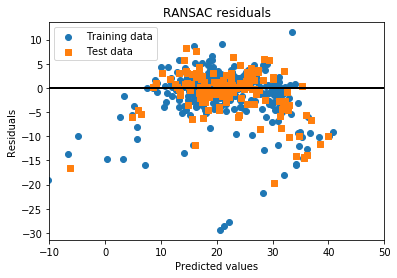

In [19]:
# 잔차 plot
plt.scatter(y_train_pred, y_train_pred - y_train,marker='o',label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.title('RANSAC residuals')
plt.xlim([-10, 50])
plt.show()

[]

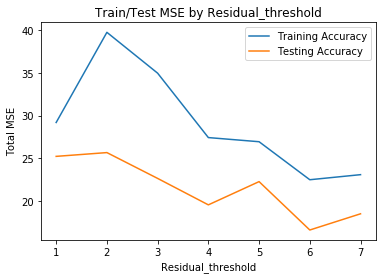

In [31]:
# MAD에 따른 변화
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
c_list = [1,2,3,4,5,6,7]

train_errors = [] 
test_errors = [] 

for x in c_list:
    dtc=RANSACRegressor(max_trials=100,min_samples=45,
                       loss='absolute_loss',residual_threshold=x, random_state=1)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Residual_threshold') # Label x-axis
plt.ylabel('Total MSE') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Train/Test MSE by Residual_threshold')
# plt.xticks([1,2,3,4,5,6,7,8,9],[0.01, 0.05, 0.1, 0.5, 1, 3, 5, 7, 10])
plt.plot() 

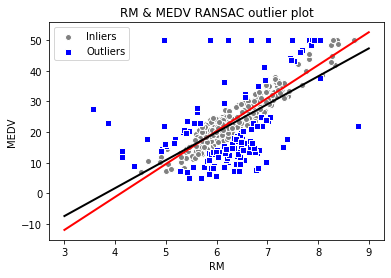

In [73]:
# RM 변수에 대해 이상치 plot으로 나타내기
X = house[['RM']].values
y = house['MEDV'].values
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_loss', residual_threshold=5.0, random_state=0)
ransac.fit(X, y)

mlr = LinearRegression()
mlr.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
line_y_mlr = mlr.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask], c='gray', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='blue', edgecolor='white', marker='s', label='Outliers')

plt.plot(line_X, line_y_ransac, color='red', lw=2)
plt.plot(line_X, line_y_mlr, color='black', lw=2)

plt.ylabel('MEDV')
plt.xlabel('RM')
plt.legend(loc='upper left')
plt.title('RM & MEDV RANSAC outlier plot')
plt.show()

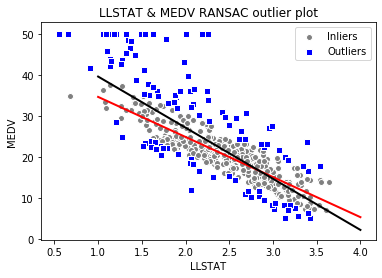

In [80]:
# LLSTAT 변수에 대해 이상치 plot으로 나타내기
X = house[['LLSTAT']].values
y = house['MEDV'].values
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_loss', residual_threshold=5.0, random_state=0)
ransac.fit(X, y)

mlr = LinearRegression()
mlr.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(1, 5, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
line_y_mlr = mlr.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask], c='gray', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='blue', edgecolor='white', marker='s', label='Outliers')

plt.plot(line_X, line_y_ransac, color='red', lw=2)
plt.plot(line_X, line_y_mlr, color='black', lw=2)

plt.ylabel('MEDV')
plt.xlabel('LLSTAT')
plt.legend(loc='upper right')
plt.title('LLSTAT & MEDV RANSAC outlier plot')
plt.show()

## 3. SVR

In [21]:
from sklearn.svm import SVR  
svl=SVR(kernel='linear', C=1.0,epsilon=0.1)    #선형 SVM회귀
svr=SVR(kernel='rbf', C=1.0,epsilon=0.1)      #비선형 SVM회귀
svl.fit(X_train,y_train)   
svr.fit(X_train,y_train)   

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
svl.coef_  # 피쳐에 할당된 가중치(선형커널에만 사용)

array([[-0.10458821,  0.02278337,  1.66254951, -2.28960438,  3.5488695 ,
        -0.01210199, -0.76001311,  0.17584307, -0.01029869, -0.64102489,
         0.01212431, -5.77971117, -0.60725402]])

In [83]:
svl.support_vectors_

array([[1.71710000e-01, 2.50000000e+01, 0.00000000e+00, ...,
        3.78080000e+02, 2.67000213e+00, 1.63510566e+00],
       [9.82349000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.96900000e+02, 3.05588620e+00, 2.89591194e+00],
       [2.76300000e-02, 7.50000000e+01, 0.00000000e+00, ...,
        3.95630000e+02, 1.46325540e+00, 1.08180517e+00],
       ...,
       [5.87205000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.96900000e+02, 2.96372548e+00, 2.89591194e+00],
       [3.30450000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.76750000e+02, 2.38692624e+00, 1.82454929e+00],
       [8.01400000e-02, 0.00000000e+00, 0.00000000e+00, ...,
        3.96900000e+02, 2.17133681e+00, 1.78507048e+00]])

In [23]:
svl.intercept_ # 결정함수의 상수

array([29.59000239])

In [24]:
X_train.columns

Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LLSTAT', 'LINDUS'],
      dtype='object')

In [25]:
y_train_predsvl=svl.predict(X_train)   
y_train_predsvr=svr.predict(X_train)  
y_test_predsvl=svl.predict(X_test)   
y_test_predsvr=svr.predict(X_test)   

# R square
svlscore=svl.score(X_train,y_train)   #선형 R^2 
print(svlscore)
svrscore=svr.score(X_train,y_train)      #비선형 에서 R^2는 의미 없음.
print(svrscore)

0.7257056445901271
0.1816163630425145


In [26]:
# 모형의 MSE
from sklearn.metrics import mean_squared_error
mse_l_train=mean_squared_error(y_train, y_train_predsvl)
mse_l_test=mean_squared_error(y_test, y_test_predsvl)
mse_n_train=mean_squared_error(y_train, y_train_predsvr)
mse_n_test=mean_squared_error(y_test, y_test_predsvr)
print('선형 SVR MSE')
print(mse_l_train,mse_l_test)
print('-'*50)
print('비선형 SVR MSE')
print(mse_n_train,mse_n_test)

선형 SVR MSE
22.269701769971398 16.382339448697692
--------------------------------------------------
비선형 SVR MSE
66.44380086215858 75.25569380095273


In [27]:
# 모형의 R^2
from sklearn.metrics import r2_score
R2_l=r2_score(y_train, y_train_predsvl)
R2_n=r2_score(y_train, y_train_predsvr)
print('선형SVR R^2 : %.2f, 비선형SVR R^2 : %.2f' % (R2_l,R2_n))

선형SVR R^2 : 0.73, 비선형SVR R^2 : 0.18


2. house 데이터에 적용된 SVM에서 epsilon의 역할을 support vector의 관점에서 논의하라.

352
351
344
306
268
123
68
39
20


[]

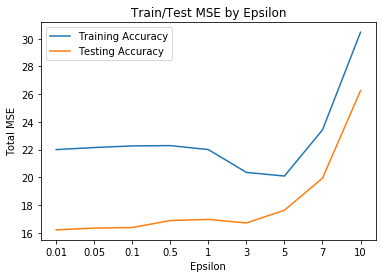

In [84]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
c_list = [0.01, 0.05, 0.1, 0.5, 1, 3, 5, 7, 10]

train_errors = [] 
test_errors = [] 

for x in c_list:
    dtc=SVR(kernel='linear', C=1.0, epsilon=x)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))
    print(len(dtc.support_vectors_))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Epsilon') # Label x-axis
plt.ylabel('Total MSE') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Train/Test MSE by Epsilon')
plt.xticks([1,2,3,4,5,6,7,8,9],[0.01, 0.05, 0.1, 0.5, 1, 3, 5, 7, 10])
plt.plot() 

Epsilon은 오차를 얼마나 허용할 것인가와 관련됨

[]

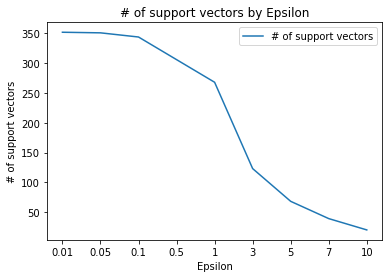

In [86]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
c_list = [0.01, 0.05, 0.1, 0.5, 1, 3, 5, 7, 10]

train_errors = [] 
test_errors = [] 

for x in c_list:
    dtc=SVR(kernel='linear', C=1.0, epsilon=x)
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(len(dtc.support_vectors_))
    test_errors.append(mean_squared_error(y_test, test_z))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='# of support vectors') # Plot training error over domain # Plot testing error over domain
plt.xlabel('Epsilon') # Label x-axis
plt.ylabel('# of support vectors') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('# of support vectors by Epsilon')
plt.xticks([1,2,3,4,5,6,7,8,9],[0.01, 0.05, 0.1, 0.5, 1, 3, 5, 7, 10])
plt.plot() 